In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.metrics import log_loss

In [63]:
yt = [1, 2, 0, 1]
yp = [[0.8, 0.1, 0.1],
     [0.1, 0.1, 0.8],
     [0.1, 0.1, 0.8],
     [0.1, 0.8, 0.1]]

log_loss(yt, yp)

1.2628643221541276

In [162]:
yt1 = [0, 1, 0]
yp1 = [0.5, 0.5, 0.1]
yp1_ = [[0.5, 0.5], [0.5, 0.5] , [0.9, 0.1]]
print(log_loss(yt1, yp1))


def onehot_encode(y):
    y = np.array(y)
    y_onehot = np.zeros((len(y), max(y)+1))
    for i, y_i in enumerate(y):
        y_onehot[i, y_i] = 1
    return y_onehot


def cross_entropy(y_true, y_pred):
    N = len(y_true)
    return -np.sum(y_true*np.log(y_pred)) / N



print(cross_entropy(onehot_encode(yt), yp))

#print(cross_entropy2(onehot_encode(yt), np.array(yp)))


0.23104906018664842
1.2628643221541276


In [67]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [206]:
def weight_init_unit_norm(input_shape, output_shape):
    return np.random.normal(size=(input_shape, output_shape))

def weight_init_ones(input_shape, output_shape):
    return np.ones((input_shape, output_shape))

def bias_init_zeros(length):
    return np.zeros(length)

def softmax(x):
    # https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python
    return np.exp(x) / np.sum(np.exp(x), axis=1)[:, None]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s*(1-s)

def ReLU(x):
    return np.maximum(x, 0, x)

def ReLU_derivative(x):
    return (x > 0).astype(int)

def cross_entropy(y_true, y_pred):
    N = len(y_true)
    return -np.sum(y_true*np.log(y_pred)) / N

def cross_entropy_derivative(y_true, y_pred):
    N = len(y_true)
    return -np.sum(y_true/y_pred) / N

def onehot_encode(y):
    y = np.array(y)
    y_onehot = np.zeros((len(y), max(y)+1))
    for i, y_i in enumerate(y):
        y_onehot[i, y_i] = 1
    return y_onehot

def one_hot_encode(y, n_classes):
    y_onehot = np.zeros((len(y), n_classes))
    for i, y_i in enumerate(y):
        y_onehot[i, y_i] = 1
    return y_onehot

def softmax_grad(x):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax(x).reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

class NeuralNetwork():
    
    def __init__(self, 
                 hidden=(8, 6),
                 init_weights='unit_norm',
                 init_bias='zeros',
                 activation='sigmoid',
                 loss='cross_entropy',
                 random_state=1):
        self.hidden = hidden
        self.init_weights = init_weights
        self.init_bias = init_bias
        self.activation = activation
        self.loss = loss
        self.random_state = random_state
        np.random.seed(self.random_state)
        self._set_act_func()
        self._set_loss()
        
        
    def _init_neural_network(self):
        implemented_weight_inits = {'unit_norm': weight_init_unit_norm,
                                    'ones': weight_init_ones
                                   }
        implemented_bias_inits = {'zeros': bias_init_zeros,
                                   }
        try:
            init_layer_weight = implemented_weight_inits[self.init_weights]
            init_layer_bias = implemented_bias_inits[self.init_bias]
        except KeyError:
            raise Exception('{} or {} not accepted'.format(self.init_weights,
                                                           self.init_bias))

        self.weights = []
        self.biases = []
        for layer in range(len(self.hidden) + 1):
            if layer == 0:
                input_shape = self.n_features
                output_shape = self.hidden[layer]
            elif layer == len(self.hidden):
                input_shape = self.hidden[layer - 1]
                output_shape = self.n_classes
            else:
                input_shape = self.hidden[layer - 1]
                output_shape = self.hidden[layer]                
            w_l = init_layer_weight(input_shape, output_shape)
            b_l = init_layer_bias(output_shape)
            self.weights.append(w_l)
            self.biases.append(b_l)
        
            
    def _set_act_func(self):
        implemented_activations = {'sigmoid': sigmoid,
                                   'ReLU': ReLU,
                                   'softmax': softmax}
        try:
            self.act = implemented_activations[self.activation]
        except KeyError:
            raise Exception('{} not accepted'.format(self.activation))

    def _set_loss(self):
        implemented_losses = {'cross_entropy': cross_entropy,}
        try:
            self.loss_func = implemented_losses[self.loss]
        except KeyError:
            raise Exception('{} not accepted'.format(self.loss))        
    
    def train(self, X, y, n_epochs=10, lr=0.1, n_classes=None):
        self.n_samples, self.n_features = X.shape
        self.classes = n_classes
        if n_classes is None:
            self.classes = set(y)
            self.n_classes = len(self.classes)
        
        y_one_hot = one_hot_encode(y, self.n_classes)
        self._init_neural_network()
        
        for e in range(n_epochs):
            pass
            # implement shuffle
        self._feed_forward(X)
        self.loss_e = self.loss_func(y_one_hot, self.activations[-1])

    
    def _feed_forward(self, X):
        self.activations = []
        act = self.act
        for layer, (w_l, b_l) in enumerate(zip(self.weights, self.biases)):
            if layer == 0:
                prev = X
            else:
                prev = self.activations[-1]

            if layer == len(self.hidden):
                act = softmax
            act_l = act(np.dot(prev, w_l) + b_l)    
            self.activations.append(act_l)
            
            
    def _back_prop(self, y):
        
        # dE_dypred
        y_pred = self.activations[-1]
        dE_dyp = cross_entropy_derivative(y, y_pred)
        
        for layer, act_l in enumerate(self.activations[::-1]):
            w_l, b_l = self.weights, self.biases
            act_l = self.activations[-1]
        

In [199]:
b= np.array([[1, 1], [0, 0], [2, 1]])
np.exp(a)/np.sum(np.exp(a), axis=1)[:, None]

array([[1, 2],
       [2, 1],
       [3, 1]])

In [210]:
c = [1, 2, 3]
c[::-1]

[3, 2, 1]

In [202]:
softmax([[0,1]])

array([[0.26894142, 0.73105858]])

In [208]:
X = [[1, 1], [0, 0], [0, 1]]
y = [1, 0, 1]

X, y = np.array(X), np.array(y)
nn = NeuralNetwork(hidden=(2,2), init_weights='unit_norm', activation='ReLU')
nn.train(X, y)
print(nn.loss_e)
for i in range(len(nn.activations)):
    print(i, nn.weights[i], '-', nn.biases[i],'-', nn.activations[i])

0.7949869095270229
0 [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]] - [0. 0.] - [[1.09617361 0.        ]
 [0.         0.        ]
 [0.         0.        ]]
1 [[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]] - [0. 0.] - [[0.94863701 0.        ]
 [0.         0.        ]
 [0.         0.        ]]
2 [[ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]] - [0. 0.] - [[0.63162962 0.36837038]
 [0.5        0.5       ]
 [0.5        0.5       ]]


In [133]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data  
y = iris.target

nn = NeuralNetwork()
activations = nn.train(X, y)
for a in activations:
    print(a.shape)

(150, 8)
(150, 6)
(150, 3)


In [120]:
acts = []
for l, (w, b) in enumerate(zip(W, B)):
    print(w.shape, b.shape)
    if l == 0:
        prev = X
    else:
        prev = acts[-1]

    act = sigmoid(np.dot(prev, w) + b)
    print(act.shape)
    acts.append(act)    

(4, 8) (8,)
(150, 8)
(8, 6) (6,)
(150, 6)
(6, 3) (3,)
(150, 3)


In [138]:
weight_init_ones(2, 2)

array([[1., 1.],
       [1., 1.]])

In [112]:
np.dot(X, W[0]) + B[0]

array([[  9.33956989,  -5.35850138,   2.45822304, ..., -11.37335331,
         13.9906279 ,  -7.10763326],
       [  8.85518127,  -5.11146491,   1.83280343, ..., -10.72101839,
         13.07478083,  -6.40544625],
       [  8.61136284,  -4.95120186,   2.22663799, ..., -10.45199389,
         12.86241329,  -6.52343255],
       ...,
       [ 12.42044737, -10.65684731,   0.92693845, ...,  -9.09889037,
         18.04753504,  -6.42805515],
       [ 12.29653054, -10.95375857,   1.64180884, ...,  -8.17399912,
         17.9504192 ,  -6.65817678],
       [ 11.28291178, -10.06526204,   1.26419818, ...,  -7.93851062,
         17.04882106,  -5.94222974]])

In [70]:
def _encode_labels(self, y):
    y_onehot = np.zeros((k, y.shape[0]))
    for idx, val in enumerate(y):
    onehot[val, idx] = 1.0
    return onehot

IndentationError: expected an indented block (<ipython-input-70-d7ac19ba7d6b>, line 4)

In [54]:

from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))



#Intialise a single neuron neural network.
neural_network = NeuralNetwork()

print("Random starting synaptic weights: ")
print(neural_network.synaptic_weights)

# The training set. We have 4 examples, each consisting of 3 input values
# and 1 output value.
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

# Train the neural network using a training set.
# Do it 10,000 times and make small adjustments each time.
neural_network.train(training_set_inputs, training_set_outputs, 10000)

print("New synaptic weights after training: ")
print(neural_network.synaptic_weights)

# Test the neural network with a new situation.
print("Considering new situation [1, 0, 0] -> ?: ")
print(neural_network.think(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]


In [49]:
import numpy as np
from scipy.special import expit
import sys
class NeuralNetMLP(object):
    def __init__(self, n_output, n_features, n_hidden=30,
        l1=0.0, l2=0.0, epochs=500, eta=0.001,
        alpha=0.0, decrease_const=0.0, shuffle=True,
        minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha

        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
    def _encode_labels(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_
        hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2
        def _sigmoid(self, z):
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)
        def _sigmoid_gradient(self, z):
        sg = self._sigmoid(z)
        return sg * (1 - sg)
        def _add_bias_unit(self, X, how='column'):
            if how == 'column':
                X_new = np.ones((X.shape[0], X.shape[1]+1))
                X_new[:, 1:] = X

IndentationError: expected an indented block (<ipython-input-49-b1a14ef87da9>, line 37)

In [ ]:
class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in xrange(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))




#Intialise a single neuron neural network.
neural_network = NeuralNetwork()

print "Random starting synaptic weights: "
print neural_network.synaptic_weights

# The training set. We have 4 examples, each consisting of 3 input values
# and 1 output value.
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

# Train the neural network using a training set.
# Do it 10,000 times and make small adjustments each time.
neural_network.train(training_set_inputs, training_set_outputs, 10000)

print "New synaptic weights after training: "
print neural_network.synaptic_weights

# Test the neural network with a new situation.
print "Considering new situation [1, 0, 0] -> ?: "
print neural_network.think(array([1, 0, 0]))

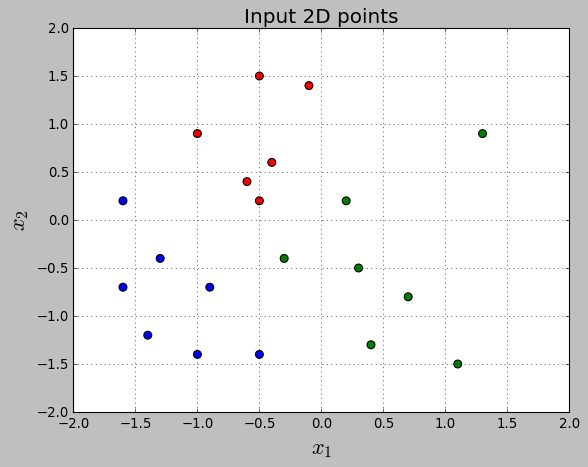

In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

X = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
                [ 1.3, 0.9],
                [-0.6, 0.4],
                [-1.6, 0.2],
                [ 0.2, 0.2],
                [-0.3,-0.4],
                [ 0.7,-0.8],
                [ 1.1,-1.5],
                [-1.0, 0.9],
                [-0.5, 1.5],
                [-1.3,-0.4],
                [-1.4,-1.2],
                [-0.9,-0.7],
                [ 0.4,-1.3],
                [-0.4, 0.6],
                [ 0.3,-0.5],
                [-1.6,-0.7],
                [-0.5,-1.4], 
                [-1.0,-1.4]])

y = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
Y = np.eye(3)[y]
colormap = np.array(['r', 'g', 'b'])

def plot_scatter(X, y, colormap, path):
   plt.grid()
   plt.xlim([-2.0, 2.0])
   plt.ylim([-2.0, 2.0])
   plt.xlabel('$x_1$', size=20)
   plt.ylabel('$x_2$', size=20)
   plt.title('Input 2D points', size=18)
   plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
   plt.savefig(path)

plot_scatter(X, y, colormap, 'image.png')



In [54]:
def stable_softmax(z):
  # z is 3 x 1
  a = np.exp(z - max(z)) / np.sum(np.exp(z - max(z)))
  # a is 3 x 1
  return a

def forward_propagate(x, W, b):
  # W is 3 x 2
  # x is 2 x 1
  # b is 3 x 1
  z = np.matmul(W, x) + b
  a = stable_softmax(z)
  # z is 3 x 1
  # a is 3 x 1
  return z, a

W = np.array([[ 0.31, 3.95],
              [ 7.07, -0.23],
              [-6.27, -2.35]])

b = np.array([[ 1.2  ],
              [ 2.93 ],
              [-4.14 ]])

z, a = forward_propagate(X[0,:].reshape(2,1), W, b)

print(z)
print(a)
print(y[0])

[[ 6.699]
 [ 1.901]
 [-6.803]]
[[0.992]
 [0.008]
 [0.   ]]
0


[[0.285]
 [0.395]
 [0.32 ]]
[[ 0.204 -0.113 -0.091]
 [-0.113  0.239 -0.126]
 [-0.091 -0.126  0.217]]
[[0.285 0.395 0.32 ]
 [0.285 0.395 0.32 ]
 [0.285 0.395 0.32 ]]
shape: x (2, 1), z (3, 1), a (3, 1), y (3, 1)
da  dL/da shape (3, 1)
matrix  da/dz shape (3, 3)
dz  dL/dz shape (3, 1)
dW  dL/dW shape (3, 2)
db  dL/db shape (3, 1)


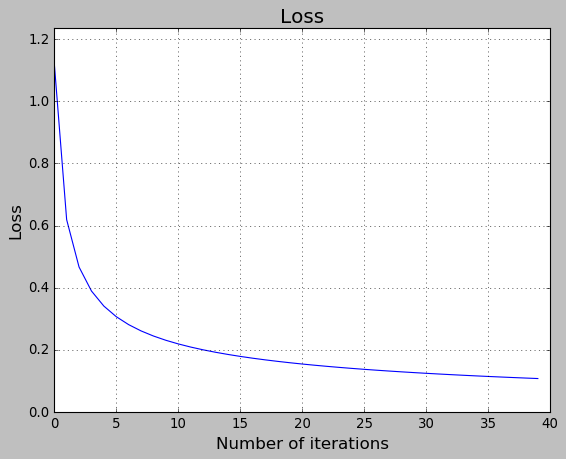

In [61]:
LEARNING_RATE = 2.0
NUM_EPOCHS = 40

def get_loss(y, a):
    return -1 * np.sum(y * np.log(a))

def get_loss_numerically_stable(y, z):
    return -1 * np.sum(y * (z + (-z.max() - np.log(np.sum(np.exp(z-z.max()))))))

def get_gradients(x, z, a, y, v):
    da = (-y / a)
    
    matrix = np.matmul(a, np.ones((1, 3))) * (np.identity(3) - np.matmul(np.ones((3, 1)), a.T))
    
    dz = np.matmul(matrix, da)

    dW = dz * x.T
    db = dz.copy()
    if v:
        print(a)
        print(matrix)
        print(np.matmul(np.ones((3, 1)), a.T) )
        print('shape: x {}, z {}, a {}, y {}'.format(x.shape, z.shape, a.shape, y.shape))
        print('da  dL/da shape {}'.format(da.shape))
        print('matrix  da/dz shape {}'.format(matrix.shape))
        print('dz  dL/dz shape {}'.format(dz.shape))
        print('dW  dL/dW shape {}'.format(dW.shape))
        print('db  dL/db shape {}'.format(db.shape))
        
    return dz, dW, db

def gradient_descent(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

# random initialization
W_initial = np.random.rand(3, 2)
W = W_initial.copy()
b = np.zeros((3, 1))

W_cache = []
b_cache = []
L_cache = []

for i in range(NUM_EPOCHS):
    dW = np.zeros(W.shape)
    db = np.zeros(b.shape)
    L = 0
    for j in range(X.shape[0]):
        x_j = X[j,:].reshape(2,1)
        y_j = Y[j,:].reshape(3,1)

        z_j, a_j = forward_propagate(x_j, W, b)
        loss_j = get_loss_numerically_stable(y_j, z_j)
        
        V=False
        if i==0 and j==0:
            V=True
        
        dZ_j, dW_j, db_j = get_gradients(x_j, z_j, a_j, y_j, v=V)

        dW += dW_j
        db += db_j
        L += loss_j

    dW *= (1.0/20)
    db *= (1.0/20)
    L *= (1.0/20)
    
    W, b = gradient_descent(W, b, dW, db, LEARNING_RATE)

    W_cache.append(W)
    b_cache.append(b)
    L_cache.append(L)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.ylim([0, max(L_cache) * 1.1])
plt.plot(L_cache)

#plt.savefig('image.png')



In [22]:
class Network(object):
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]
        
    def backprop(self, x, y):
        """Return a tuple "(nabla_b, nabla_w)" representing the
        gradient for the cost function C_x.  "nabla_b" and
        "nabla_w" are layer-by-layer lists of numpy arrays, similar
        to "self.biases" and "self.weights"."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)


    
    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y) 

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [37]:
a = np.random.rand(1,3)
b = np.random.rand(3,1)


In [43]:
np.dot(a.T, b.T)

array([[0.495, 0.07 , 0.223],
       [0.632, 0.089, 0.284],
       [0.686, 0.096, 0.309]])

In [84]:
# https://peterroelants.github.io/posts/neural-network-implementation-part04/

def logistic(z):
    """Logistic function."""
    out = 1. / (1. + np.exp(-z))
    print("logistic(z) z.shape {} out {}".format(z.shape, out.shape))
    return out


def softmax(z):
    """Softmax function"""
    out = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    print("softmax(z) z.shape {} out.shape {}".format(z.shape, out.shape))
    return out 


def hidden_activations(X, Wh, bh):
    """Compute the hidden activations h"""
    out = logistic((X @ Wh) + bh)
    print("hidden_activations X {}, Wh {}, bh {} out.shape {}".format(X.shape, Wh.shape, bh.shape, out.shape))
    return out


def output_activations(H, Wo, bo):
    """Compute the output y"""
    out = softmax((H @ Wo) + bo)
    print("output_activations H {}, Wo {}, bo {} out {}".format(H.shape, Wo.shape, bo.shape, out.shape))
    return out


def nn(X, Wh, bh, Wo, bo):
    """Neural network as function."""
    return output_activations(hidden_activations(X, Wh, bh), Wo, bo)


def nn_predict(X, Wh, bh, Wo, bo):
    """Neural network prediction function that only returns
    1 or 0 depending on the predicted class"""
    print("nn_predict X {}, Wh {}, bh {}, Wo {}, bo {}".format(X.shape, Wh.shape, bh.shape, 
                                                                       Wo.shape, bo.shape))

    return np.around(nn(X, Wh, bh, Wo, bo))



def loss(Y, T):
    """Loss function"""
    out = - (T * np.log(Y)).sum()
    print("loss Y {}, T {}, out {}".format(Y.shape, T.shape, out.shape))
    
    return out


def error_output(Y, T):
    out = Y - T
    print("error_output Y {}, T {}, out {}".format(Y.shape, T.shape, out.shape))
    """Error function at the output"""
    return out


def gradient_weight_out(H, Eo):
    """Gradients for the weight parameters at the output layer"""
    out = H.T @ Eo
    print("gradient_weight_out H {}, Eo {}, out {}".format(H.shape, Eo.shape, out.shape))
    return  out


def gradient_bias_out(Eo):
    """Gradients for the bias parameters at the output layer"""
    out = np.sum(Eo, axis=0, keepdims=True)
    print("gradient_bias_out Eo {}, out {}".format(Eo.shape, out.shape))
    return out




def error_hidden(H, Wo, Eo):
    """Error at the hidden layer.
    H * (1-H) * (E . Wo^T)"""
    out = np.multiply(np.multiply(H,(1 - H)), (Eo @ Wo.T))
    print("error_hidden H {}, Wo {}, Eo {} out {}".format(H.shape, Wo.shape, Eo.shape, out.shape))
    return out


def gradient_weight_hidden(X, Eh):
    """Gradient for the weight parameters at the hidden layer"""
    out = X.T @ Eh
    print("gradient_weight_hidden X {}, Eh {}, out {}".format(X.shape, Eh.shape, out.shape))
    return out


def gradient_bias_hidden(Eh):
    """Gradient for the bias parameters at the output layer"""
    out = np.sum(Eh, axis=0, keepdims=True)
    print("gradient_bias_hidden Eh {}, out {}".format(Eh.shape, out.shape))
    return out





def backprop_gradients(X, T, Wh, bh, Wo, bo):
    """Update the network parameters over 1 iteration."""
    # Compute the output of the network
    # Compute the activations of the layers
    H = hidden_activations(X, Wh, bh)
    Y = output_activations(H, Wo, bo)
    # Compute the gradients of the output layer
    Eo = error_output(Y, T)
    JWo = gradient_weight_out(H, Eo)
    Jbo = gradient_bias_out(Eo)
    # Compute the gradients of the hidden layer
    Eh = error_hidden(H, Wo, Eo)
    JWh = gradient_weight_hidden(X, Eh)
    Jbh = gradient_bias_hidden(Eh)
    return [JWh, Jbh, JWo, Jbo]


def update_momentum(X, T, ls_of_params, Ms, momentum_term, 
                    learning_rate):
    """Update the momentum term."""
    # ls_of_params = [Wh, bh, Wo, bo]
    # Js = [JWh, Jbh, JWo, Jbo]
    Js = backprop_gradients(X, T, *ls_of_params)
    return [momentum_term * M - learning_rate * J 
            for M,J in zip(Ms, Js)]

def update_params(ls_of_params, Ms):
    """Update the parameters."""
    # ls_of_params = [Wh, bh, Wo, bo]
    # Ms = [MWh, Mbh, MWo, Mbo]
    return [P + M for P,M in zip(ls_of_params, Ms)]




X = np.random.rand(100, 2)
T = np.random.randint(0, 2, size=100)
T = np.vstack((T, 1-T)).T

init_var = 0.1
# Initialize hidden layer parameters
bh = np.random.randn(1, 3) * init_var
Wh = np.random.randn(2, 3) * init_var
# Initialize output layer parameters
bo = np.random.randn(1, 2) * init_var
Wo = np.random.randn(3, 2) * init_var
# Parameters are already initilized randomly with the gradient checking
# Set the learning rate
learning_rate = 0.02
momentum_term = 0.9

# Moments Ms = [MWh, Mbh, MWo, Mbo]
Ms = [np.zeros_like(M) for M in [Wh, bh, Wo, bo]]

# Start the gradient descent updates and plot the iterations
nb_of_iterations = 1  # number of gradient descent updates
# learning rate update rule
lr_update = learning_rate / nb_of_iterations
# list of loss over the iterations
ls_loss = [loss(nn(X, Wh, bh, Wo, bo), T)]
for i in range(nb_of_iterations):
    # Update the moments and the parameters
    Ms = update_momentum(
        X, T, [Wh, bh, Wo, bo], Ms, momentum_term, learning_rate)
    Wh, bh, Wo, bo = update_params([Wh, bh, Wo, bo], Ms)
    ls_loss.append(loss(nn(X, Wh, bh, Wo, bo), T))

logistic(z) z.shape (100, 3) out (100, 3)
hidden_activations X (100, 2), Wh (2, 3), bh (1, 3) out.shape (100, 3)
softmax(z) z.shape (100, 2) out.shape (100, 2)
output_activations H (100, 3), Wo (3, 2), bo (1, 2) out (100, 2)
loss Y (100, 2), T (100, 2), out ()
logistic(z) z.shape (100, 3) out (100, 3)
hidden_activations X (100, 2), Wh (2, 3), bh (1, 3) out.shape (100, 3)
softmax(z) z.shape (100, 2) out.shape (100, 2)
output_activations H (100, 3), Wo (3, 2), bo (1, 2) out (100, 2)
error_output Y (100, 2), T (100, 2), out (100, 2)
gradient_weight_out H (100, 3), Eo (100, 2), out (3, 2)
gradient_bias_out Eo (100, 2), out (1, 2)
error_hidden H (100, 3), Wo (3, 2), Eo (100, 2) out (100, 3)
gradient_weight_hidden X (100, 2), Eh (100, 3), out (2, 3)
gradient_bias_hidden Eh (100, 3), out (1, 3)
logistic(z) z.shape (100, 3) out (100, 3)
hidden_activations X (100, 2), Wh (2, 3), bh (1, 3) out.shape (100, 3)
softmax(z) z.shape (100, 2) out.shape (100, 2)
output_activations H (100, 3), Wo (3, 2),

In [88]:
a = np.random.rand(100, 3)
b = np.random.rand(100, 3)
c = np.multiply(a, b)
print(a[0], b[0], c[0])

[0.275 0.529 0.564] [0.405 0.696 0.293] [0.111 0.368 0.165]
